In [2]:
from yt_rag.frames.framers_extractor.collect_frames import FrameCollector

In [ ]:

collctor=FrameCollector(youtube_url="https://www.youtube.com/watch?v=t9mRf2S5vDI")
collctor.run()

starting frame extraction for video ID: t9mRf2S5vDI
[youtube] Extracting URL: https://www.youtube.com/watch?v=t9mRf2S5vDI
[youtube] t9mRf2S5vDI: Downloading webpage
[youtube] t9mRf2S5vDI: Downloading tv client config
[youtube] t9mRf2S5vDI: Downloading tv player API JSON
[youtube] t9mRf2S5vDI: Downloading tv simply player API JSON
Successfully found stream URL for a video of 1776 seconds.
successfully retrieved video stream URL.
extracting one frame every 20 seconds...
Directory 't9mRf2S5vDI' created. Starting FAST frame extraction...
process complete


In [1]:
from yt_rag.vector_store.qdrant_vector_store import QdrantVectorStore

c:\Users\bored\Documents\YT_RAG\YT_RAG\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
vector_store = QdrantVectorStore()


QdrantVectorStore initialized.


In [3]:
from pathlib import Path

In [4]:
def list_images(dir_path: str):
    p = Path(dir_path)
    exts = ("*.jpg", "*.jpeg", "*.png", "*.webp")
    files = [f.resolve() for pattern in exts for f in p.glob(pattern)]
    return sorted(files)  


In [5]:
images=list_images("./t9mRf2S5vDI")

In [6]:
images

[WindowsPath('C:/Users/bored/Documents/YT_RAG/YT_RAG/src/yt_rag/framers_extractor/t9mRf2S5vDI/frame_0001.jpg'),
 WindowsPath('C:/Users/bored/Documents/YT_RAG/YT_RAG/src/yt_rag/framers_extractor/t9mRf2S5vDI/frame_0002.jpg'),
 WindowsPath('C:/Users/bored/Documents/YT_RAG/YT_RAG/src/yt_rag/framers_extractor/t9mRf2S5vDI/frame_0003.jpg'),
 WindowsPath('C:/Users/bored/Documents/YT_RAG/YT_RAG/src/yt_rag/framers_extractor/t9mRf2S5vDI/frame_0004.jpg'),
 WindowsPath('C:/Users/bored/Documents/YT_RAG/YT_RAG/src/yt_rag/framers_extractor/t9mRf2S5vDI/frame_0005.jpg'),
 WindowsPath('C:/Users/bored/Documents/YT_RAG/YT_RAG/src/yt_rag/framers_extractor/t9mRf2S5vDI/frame_0006.jpg'),
 WindowsPath('C:/Users/bored/Documents/YT_RAG/YT_RAG/src/yt_rag/framers_extractor/t9mRf2S5vDI/frame_0007.jpg'),
 WindowsPath('C:/Users/bored/Documents/YT_RAG/YT_RAG/src/yt_rag/framers_extractor/t9mRf2S5vDI/frame_0008.jpg'),
 WindowsPath('C:/Users/bored/Documents/YT_RAG/YT_RAG/src/yt_rag/framers_extractor/t9mRf2S5vDI/frame_0009

In [7]:
was_successful = vector_store.add_images(
    collection_name="test_collection0.003",
    image_paths=images,
    video_id="t9mRf2S5vDI"
)

Creating embeddings for 30 images...
Embeddings created successfully.
Upserting to collection 'test_collection0.003'...
Entering the try block
Recieved clinet
There is this collection test_collection0.003
completed constructing points
upserting completed


In [4]:
search_query = "What is the similarity search"
results = vector_store.search(
    collection_name="test_collection0.003",
    query=search_query
)

Creating embedding for query: 'What is the similarity search'...
Query embedding created.
Searching collection 'test_collection0.003'...
Search complete.


In [5]:
results

[{'score': 0.25675556,
  'id': 0,
  'image_path': 'C:\\Users\\bored\\Documents\\YT_RAG\\YT_RAG\\src\\yt_rag\\framers_extractor\\t9mRf2S5vDI\\frame_0001.jpg',
  'video_id': 't9mRf2S5vDI'},
 {'score': 0.25634265,
  'id': 1,
  'image_path': 'C:\\Users\\bored\\Documents\\YT_RAG\\YT_RAG\\src\\yt_rag\\framers_extractor\\t9mRf2S5vDI\\frame_0002.jpg',
  'video_id': 't9mRf2S5vDI'}]

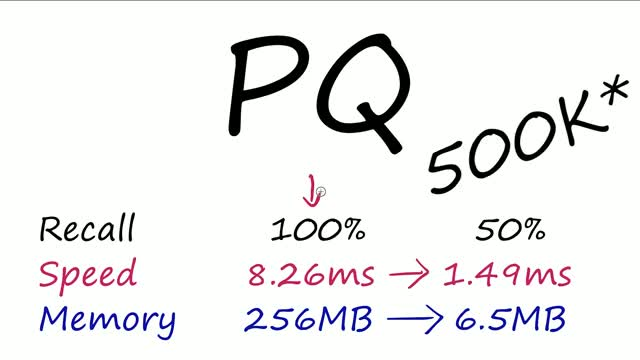

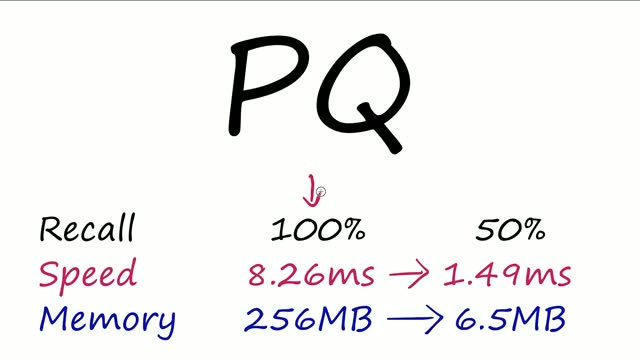

In [6]:
from PIL import Image
from IPython.display import display

for item in results:
    p = Path(item["image_path"])
    img = Image.open(p)
    display(img)  
